In [1]:
import pandas as pd 
클러스터링=pd.read_csv("c:/data/project/team/revised/클러스터링1.csv",encoding='cp949',index_col=0) 
편의점=pd.read_csv("c:/data/project/team/revised/머신러닝용.csv",encoding='cp949',index_col=0) 


In [2]:
클러스터링

,유사업종점포수,점포별월매출금액,분류
상권코드명,,,
가로공원로58길,1.00,1.435792e+08,1
가로공원로76가길,3.75,1.307519e+08,1
가로공원로80길,1.60,3.455603e+08,2
가마산로61길,1.60,9.130879e+07,1
가산디지털단지역_1,11.60,3.036476e+08,2
...,...,...,...
휘경로2길,5.10,2.432907e+08,2
휘경로3길,3.65,1.853671e+08,1
흑석로13길,1.95,3.123669e+08,2


In [3]:
클러스터링=클러스터링.loc[:,['분류']].reset_index()


In [4]:
편의점최종=pd.merge(클러스터링,편의점)

In [5]:
매출이낮은상권=편의점최종[편의점최종['분류']==0]
매출이중간인상권=편의점최종[편의점최종['분류']==1]
매출이높은상권=편의점최종[편의점최종['분류']==2]
 
편의점=pd.concat([매출이낮은상권,매출이중간인상권],axis=0)



In [6]:
print(len(매출이낮은상권))
print(len(매출이중간인상권))
print(len(매출이높은상권))
 

68
773
403


In [7]:
print(str(매출이낮은상권['점포별월매출금액'].min())+"에서"+str(매출이낮은상권['점포별월매출금액'].max()))
print(str(매출이중간인상권['점포별월매출금액'].min())+"에서"+str(매출이중간인상권['점포별월매출금액'].max()))
print(str(매출이높은상권['점포별월매출금액'].min())+"에서"+str(매출이높은상권['점포별월매출금액'].max()))
 


416968948.045에서1063667246.2631578
5384271.5에서203620341.1
203737008.4775에서412845590.65


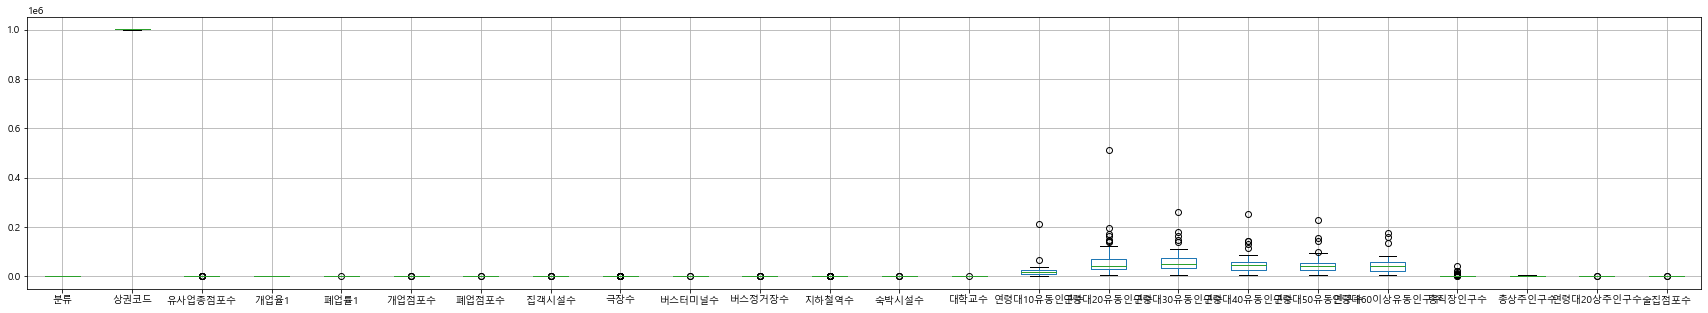

In [8]:
# 카페.loc[:,[-'점포별월매출금액']]
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
매출이낮은상권.iloc[:,:-1].boxplot(figsize=(30,5))

In [9]:
매출이중간인상권.columns

Index(['상권코드명', '분류', '상권코드', '시군구명', '유사업종점포수', '개업율1', '폐업률1', '개업점포수',
       '폐업점포수', '집객시설수', '극장수', '버스터미널수', '버스정거장수', '지하철역수', '숙박시설수', '대학교수',
       '연령대10유동인구수', '연령대20유동인구수', '연령대30유동인구수', '연령대40유동인구수', '연령대50유동인구수',
       '연령대60이상유동인구수', '총직장인구수', '총상주인구수', '연령대20상주인구수', '술집점포수', '점포별월매출금액'],
      dtype='object')

In [10]:
cols=[    '개업율1', '폐업률1', '집객시설수', '극장수', '버스터미널수', '버스정거장수', '지하철역수', '숙박시설수', '대학교수', '총직장인구수', '총상주인구수', '술집점포수']
X=매출이중간인상권[cols] #독립변수
y=매출이중간인상권['점포별월매출금액'] #종속변수]


In [11]:
# cols=[   '개업율1', '폐업률1','집객시설수', '극장수', '버스터미널수', '버스정거장수', '지하철역수', '숙박시설수', '대학교수',
#        '연령대10유동인구수', '연령대20유동인구수','총직장인구수', '연령대20상주인구수', '술집점포수']
# X=매출이낮은상권[cols] #독립변수
# y=매출이낮은상권['점포별월매출금액'] #종속변수]


In [12]:
X.to_csv("c:/data/project/team/revised/최종머신러닝용.csv",encoding='cp949')

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=0)

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X_train)
Xt_scaled=scaler.fit_transform(X_test)

In [15]:

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()  
scaler.fit(X_train)
X_train_scaled=pd.DataFrame(scaler.transform(X_train),columns=X.columns)
X_test_scaled=pd.DataFrame(scaler.transform(X_test),columns=X.columns)


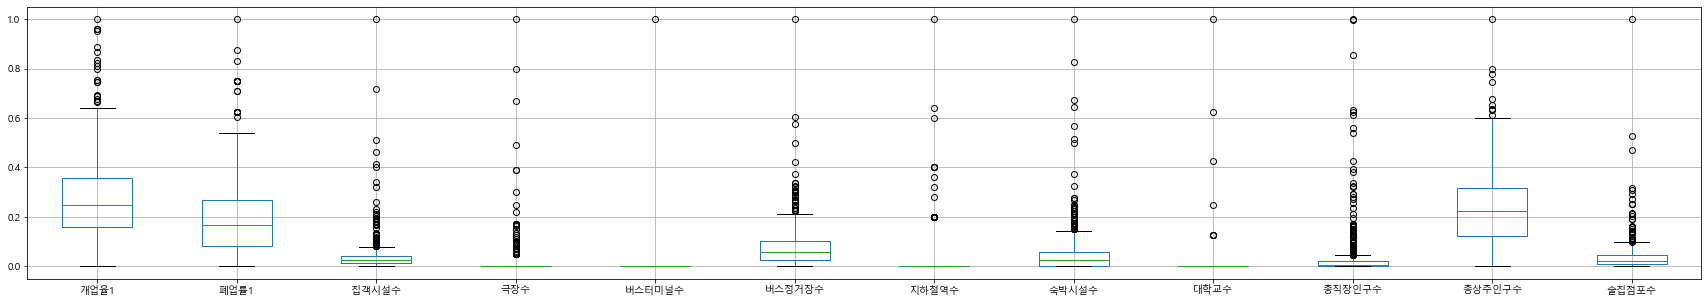

In [16]:
# 편의점.loc[:,[-'점포별월매출금액']]
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
X_train_scaled.boxplot(figsize=(30,5))

In [17]:
import statsmodels.api as sm 
model1=sm.OLS(y_train.values,X_train_scaled).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.810
Model:                            OLS   Adj. R-squared (uncentered):              0.806
Method:                 Least Squares   F-statistic:                              215.4
Date:                Tue, 24 Nov 2020   Prob (F-statistic):                   1.96e-209
Time:                        18:03:43   Log-Likelihood:                         -11947.
No. Observations:                 618   AIC:                                  2.392e+04
Df Residuals:                     606   BIC:                                  2.397e+04
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
개업율1        8.213e+07   1.43e+07      5.757      0.000    5.41e+07     1.1e+08
폐업률1        9.958e+07   1.65e+07      6.020      0.000    6.71e+07    1.32e+08
집객시설수       4.185e+07    6.2e+07      0.675      0.500   -7.98e+07    1.64e+08
극장수        -2.402e+08    5.2e+07     -4.617      0.000   -3.42e+08   -1.38e+08
버스터미널수     -2.431e+07    6.1e+07     -0.399      0.690   -1.44e+08    9.54e+07
버스정거장수      1.388e+08    3.8e+07      3.649      0.000    6.41e+07    2.13e+08
지하철역수       3.712e+07   3.54e+07      1.047      0.295   -3.25e+07    1.07e+08
숙박시설수       1.168e+08   3.87e+07      3.018      0.003    4.08e+07    1.93e+08
대학교수        9.153e+07   4.69e+07      1.953      0.051    -5.3e+05    1.84e+08
총직장인구수      9.478e+07   3.04e+07      3.115      0.002     3.5e+07    1.55e+08
총상주인구수      2.256e+08   1.45e+07     15.599      0.000    1.97e+08    2.54e+08
술집점포수       6.938e+07   5.73e+07      1.211      0.226   -4.31e+07    1.82e+08
==============================================================================
Omnibus:                       19.035   Durbin-Watson:                   1.793
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.397
Skew:                          -0.396   Prob(JB):                     3.72e-05
Kurtosis:                       3.407   Cond. No.                         13.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
#다중공선성 문제를 해결하기 위하여 vif 확인
#vif(Variance Inflation Factor)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF Factor']=[variance_inflation_factor(X_train_scaled.values, i) for i in range(X.shape[1])]
vif['features']=X_train_scaled.columns 
vif=vif.sort_values('VIF Factor').reset_index(drop=True)
vif.sort_values(by='VIF Factor', ascending=False).head(50)

,VIF Factor,features
11,4.141017,집객시설수
10,3.634214,개업율1
9,3.152147,버스정거장수
8,2.931350,폐업률1
7,2.877544,술집점포수
6,2.624684,숙박시설수
5,2.560683,총상주인구수
4,2.480008,극장수
3,1.730678,지하철역수
2,1.628541,총직장인구수
